In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

In [ ]:
df = fetch_california_housing()
dataset = pd.DataFrame(df.data)

In [ ]:
dataset

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
dataset.columns = df.feature_names
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
X = dataset
y = df.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14448, 8), (6192, 8), (14448,), (6192,))

In [ ]:
# scaling x_train and x_test using the standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train, X_test

(array([[ 0.13350629,  0.50935748,  0.18106017, ..., -0.01082519,
         -0.80568191,  0.78093406],
        [-0.53221805, -0.67987313, -0.42262953, ..., -0.08931585,
         -1.33947268,  1.24526986],
        [ 0.1709897 , -0.36274497,  0.07312833, ..., -0.04480037,
         -0.49664515, -0.27755183],
        ...,
        [-0.49478713,  0.58863952, -0.59156984, ...,  0.01720102,
         -0.75885816,  0.60119118],
        [ 0.96717102, -1.07628333,  0.39014889, ...,  0.00482125,
          0.90338501, -1.18625198],
        [-0.68320166,  1.85715216, -0.82965604, ..., -0.0816717 ,
          0.99235014, -1.41592345]]),
 array([[-1.1526893 , -0.28346293, -0.50781822, ...,  0.06127763,
          0.19166399,  0.28664112],
        [-0.70640568,  0.11294728, -0.16252032, ..., -0.03551561,
         -0.23911452,  0.06196251],
        [-0.20830675,  1.85715216, -0.59546738, ..., -0.14215427,
          1.00639726, -1.42590916],
        ...,
        [-0.19155996, -0.99700129, -0.6830438 , ..., -

# Model Building

## 1. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [ ]:
# fitting the data in the regression model
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# getting the training data score
train = lin_reg.predict(X_train)

In [ ]:
# calculating the cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse = np.mean(score)
mse

np.float64(-0.5268253746355748)

In [ ]:
# getting the pred array with the fitted model
pred = lin_reg.predict(X_test)
pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

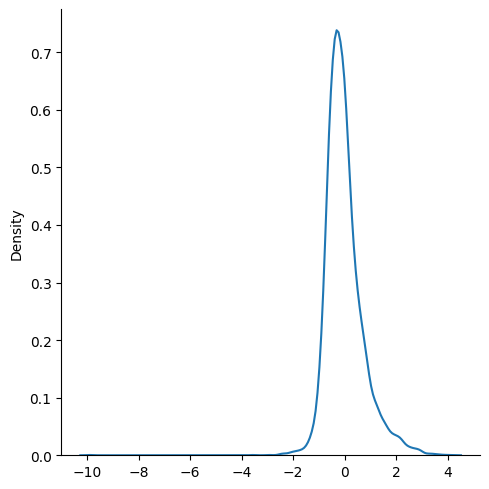

In [ ]:
# plotting a distplot to get the comparisons of actual vs pred
import seaborn as sns
sns.displot(y_test - pred, kind='kde')

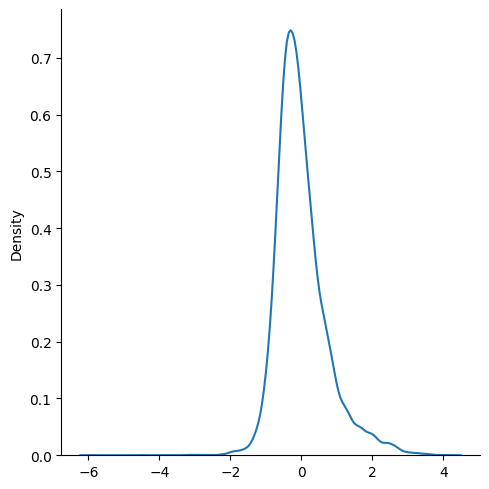

In [ ]:
sns.displot(y_train - train, kind='kde')

In [ ]:
# get the r2_score
from sklearn.metrics import r2_score
train_score = r2_score(y_train, train)
test_score = r2_score(y_test, pred)
train_score, test_score

(0.6093459727972159, 0.5957702326061664)

Clearly, we can see that the model is underfitted -> high bias and high variance

## 2. Ridge Regression

In [ ]:
# ridge regression

from sklearn.linear_model import Ridge
ridge_reg = Ridge()

In [ ]:
# need to create the dict of the hyper-parameters to be tuned
params = {
    "alpha" : [1, 2, 3, 4, 5, 10, 15, 20 ,25, 30, 35, 40, 45, 50, 55, 560, 65]
}


# doing hyperparameter tuning using gridSearchCV
from sklearn.model_selection import GridSearchCV
ridge_reg_cv = GridSearchCV(ridge_reg, param_grid=params, scoring='neg_mean_squared_error', cv=5)
ridge_reg_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40,
                                   45, 50, 55, 560, 65]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridge_reg_cv.best_params_)
print(ridge_reg_cv.best_score_)

{'alpha': 5}
-0.5268179966861514


In [ ]:
train = ridge_reg_cv.predict(X_train)

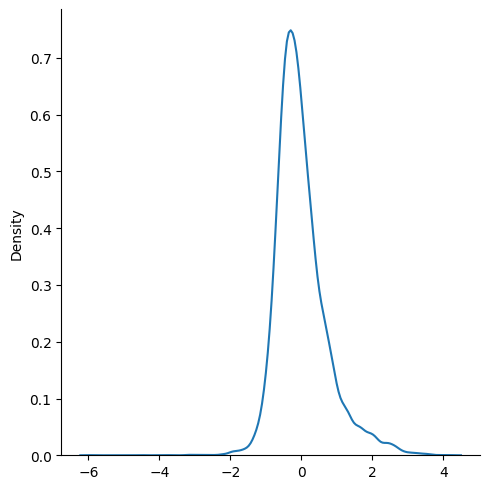

In [ ]:
sns.displot(y_train-train, kind='kde')

In [ ]:
pred = ridge_reg_cv.predict(X_test)
train_score = r2_score(y_train, train)
test_score = r2_score(y_test, pred)
train_score, test_score

(0.6093456137024972, 0.5958066655445643)

## 3. Lasso Regression

In [ ]:
# doing the lasso regression using grid search cv for hyper parameter tuning

from sklearn.linear_model import Lasso
lasso_reg = Lasso()

In [ ]:
lasso_reg_cv = GridSearchCV(lasso_reg, param_grid=params, cv=5, scoring='neg_mean_squared_error')
lasso_reg_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40,
                                   45, 50, 55, 560, 65]},
             scoring='neg_mean_squared_error')

In [ ]:
print(lasso_reg_cv.best_params_, lasso_reg_cv.best_score_)

{'alpha': 1} -1.3400019579636542


In [ ]:
train = lasso_reg_cv.predict(X_train)
pred = lasso_reg_cv.predict(X_test)

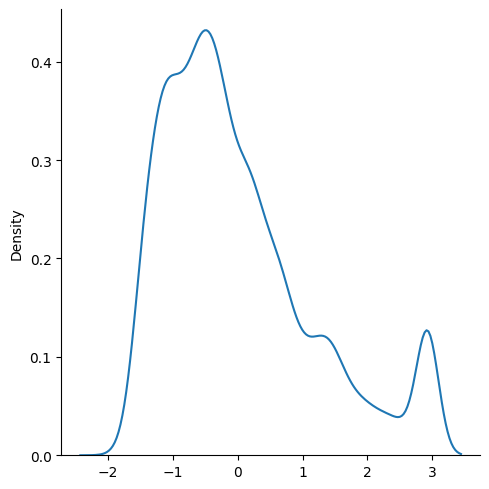

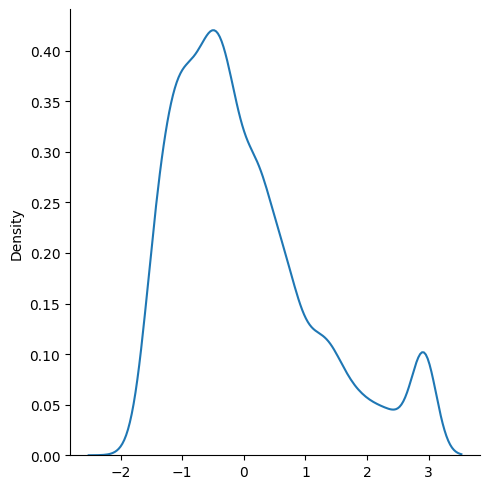

In [ ]:
sns.displot(y_train - train, kind = "kde")
sns.displot(y_test - pred, kind = "kde")

In [ ]:
test_score = r2_score(y_test, pred)
train_score = r2_score(y_train, train)
print(train_score, test_score)

0.0 -3.930972139576383e-06
